/home/thkitapci/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



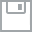
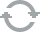
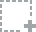
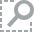
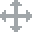
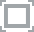
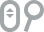
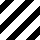
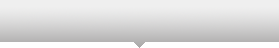
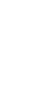
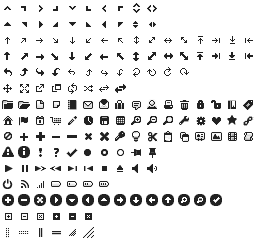
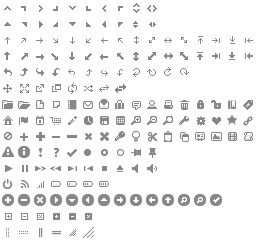
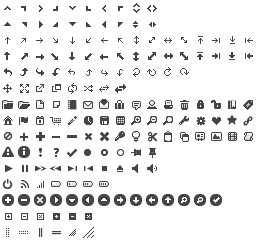
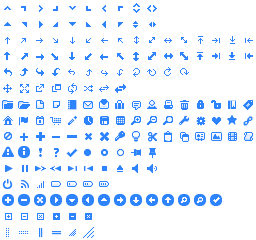
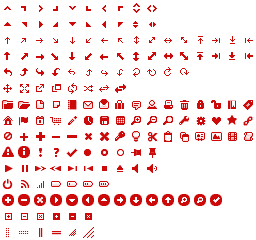
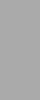
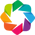
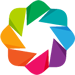

In [1]:
#Author T. Hamdi Kitapci
#Downloaded from http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html
#Recommended to add this at the beginning of each .py file

# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import numpy as np
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()



###########Set plotly offline mode
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go

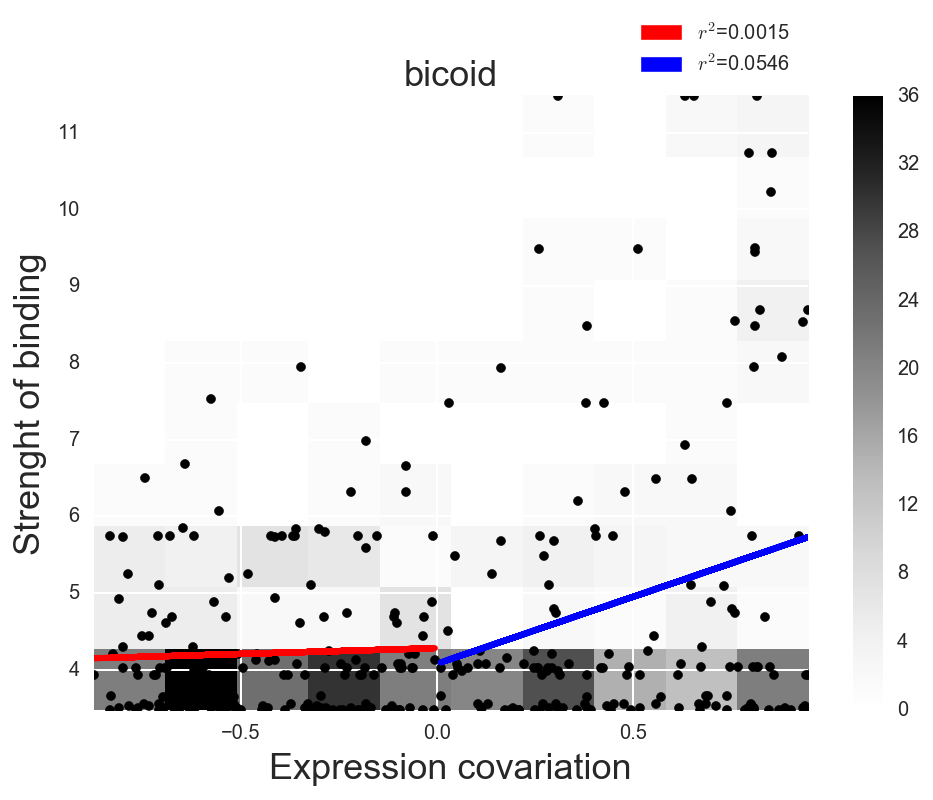

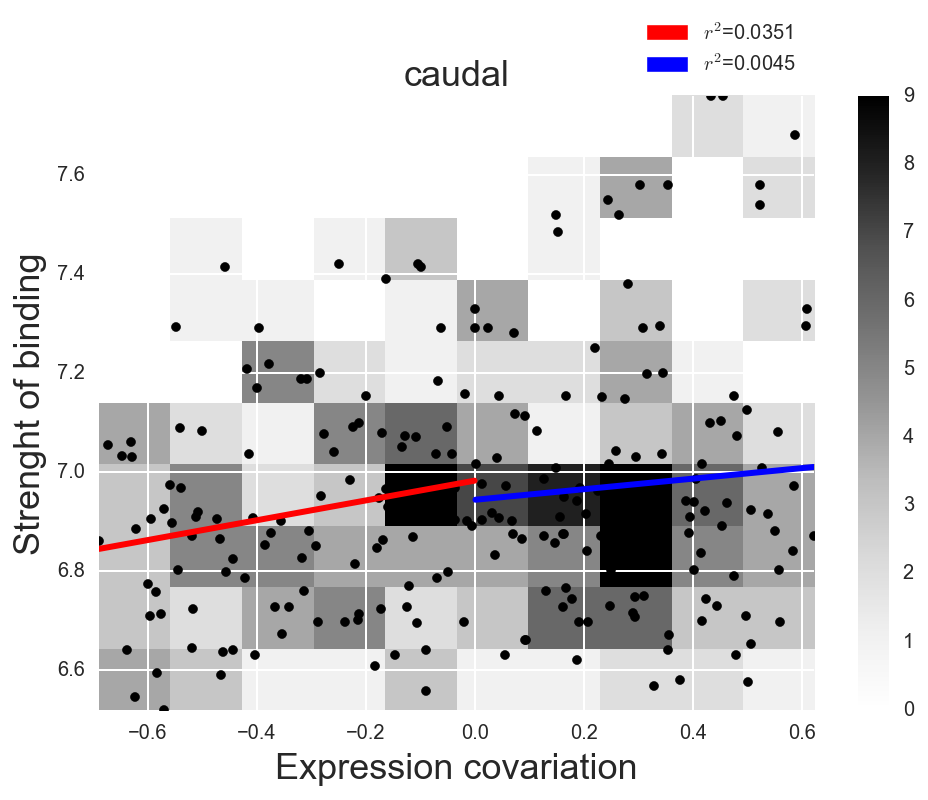

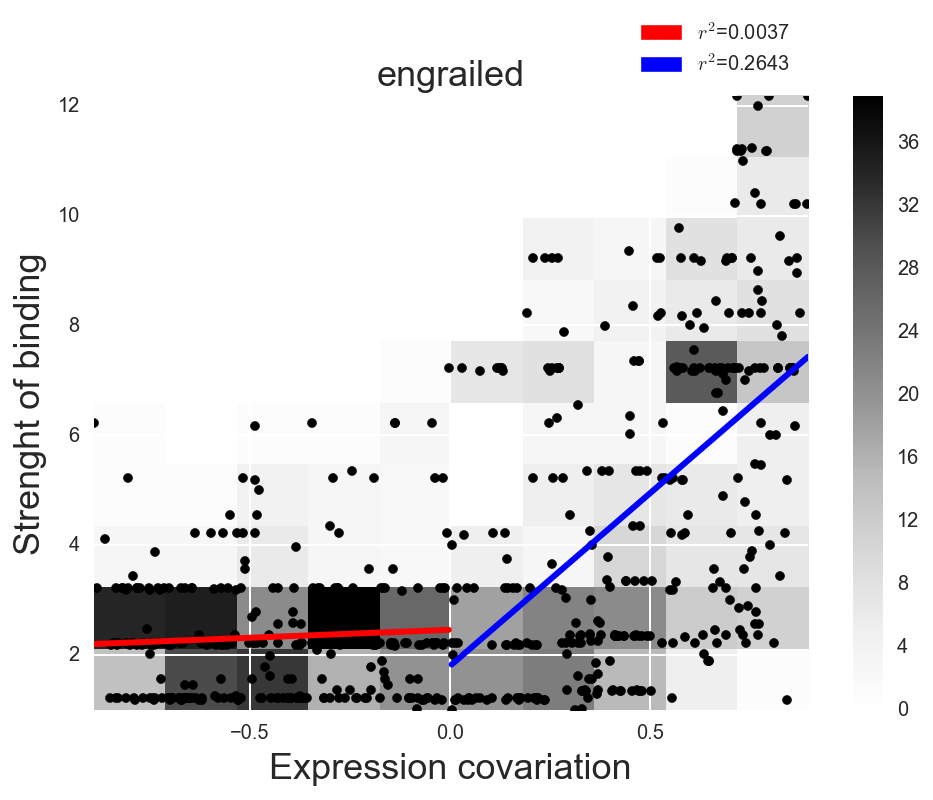

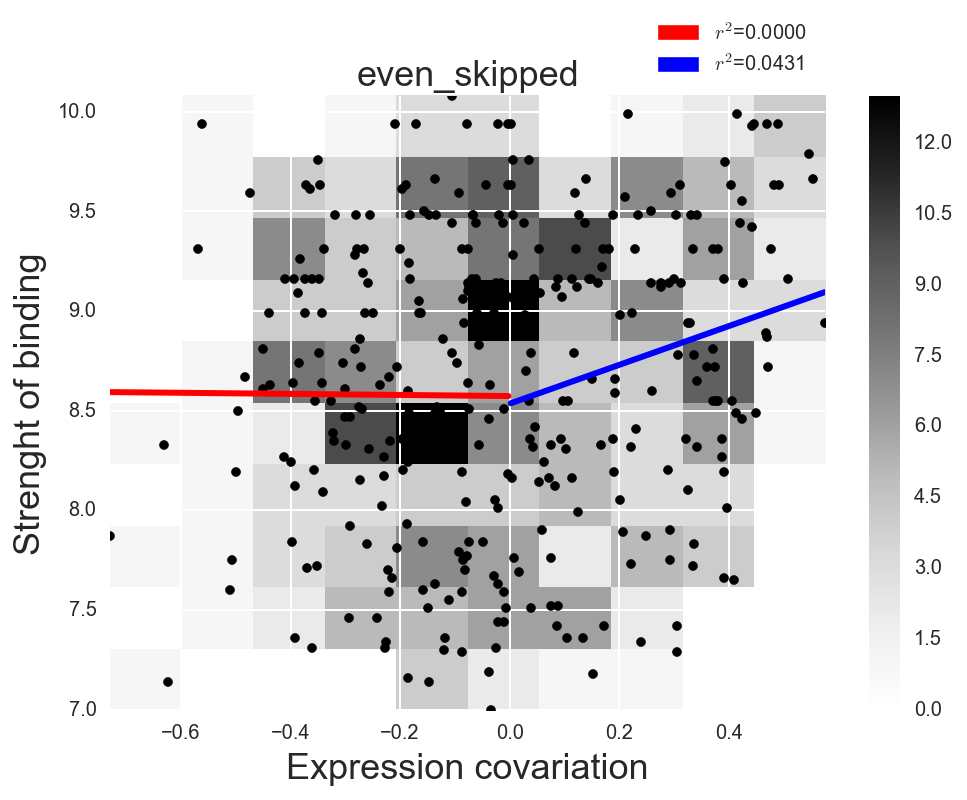

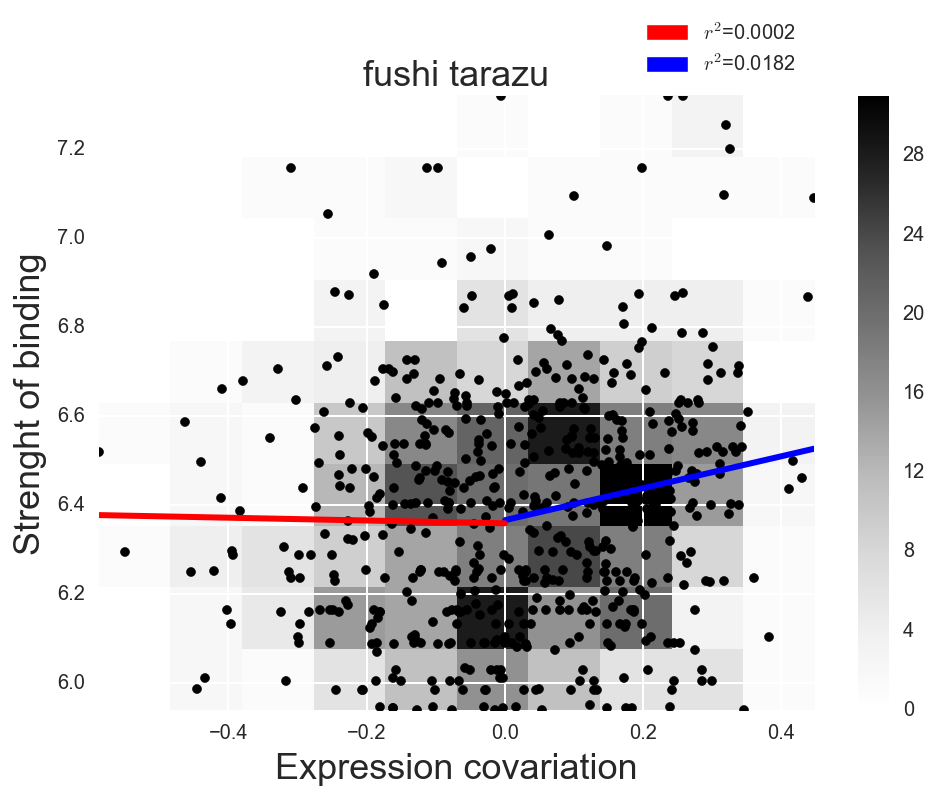

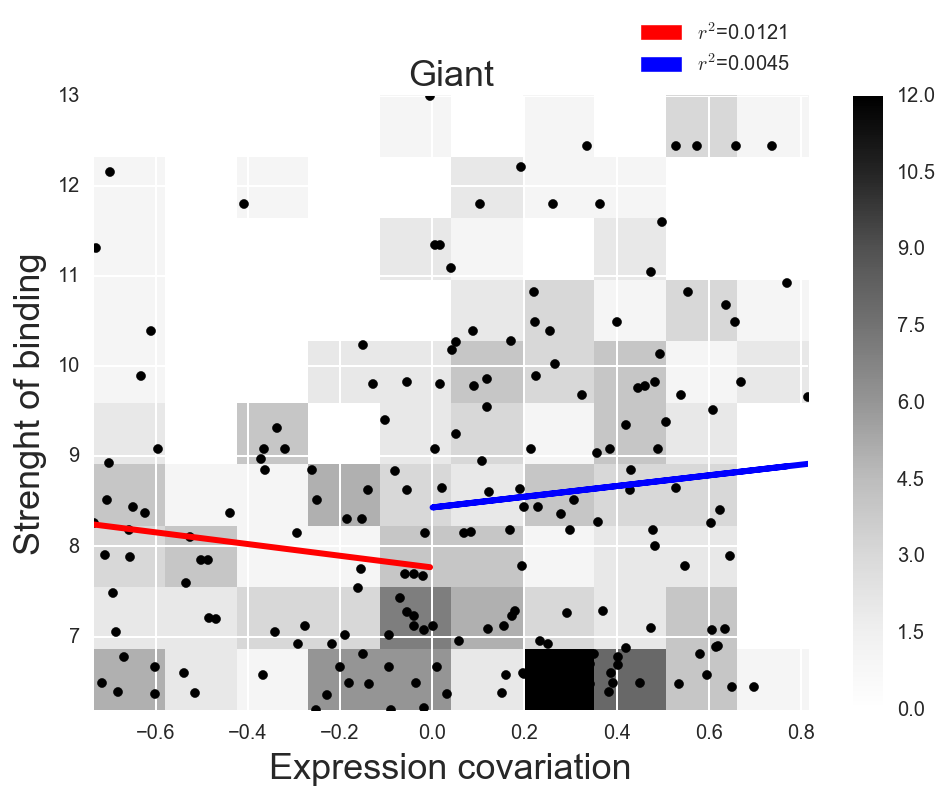

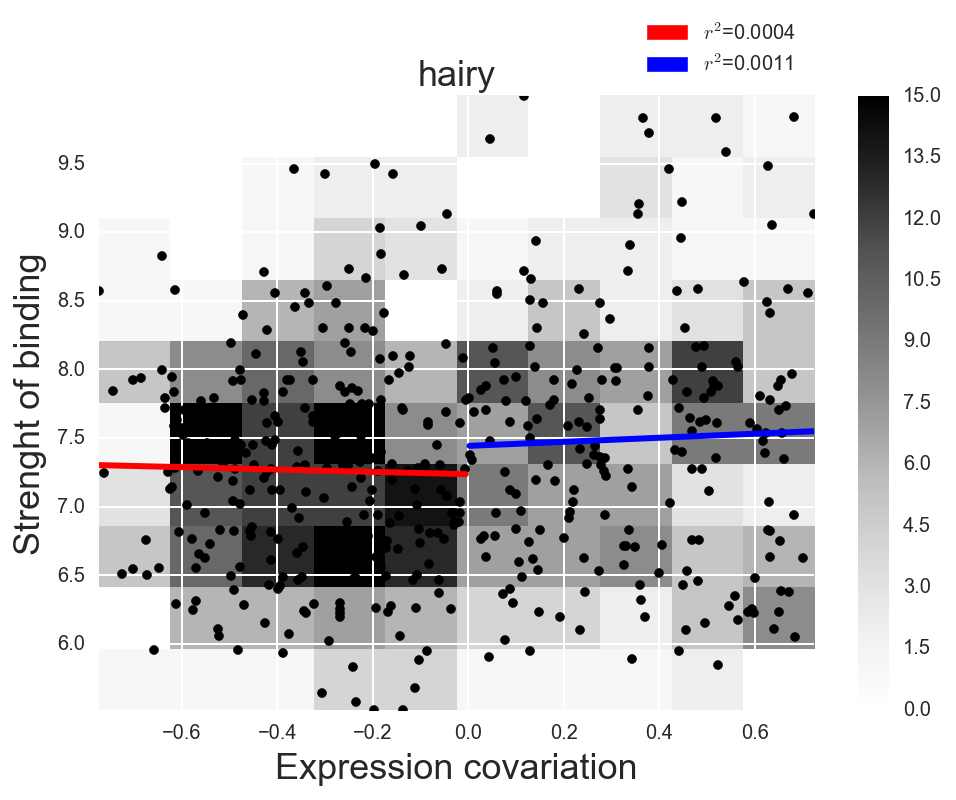

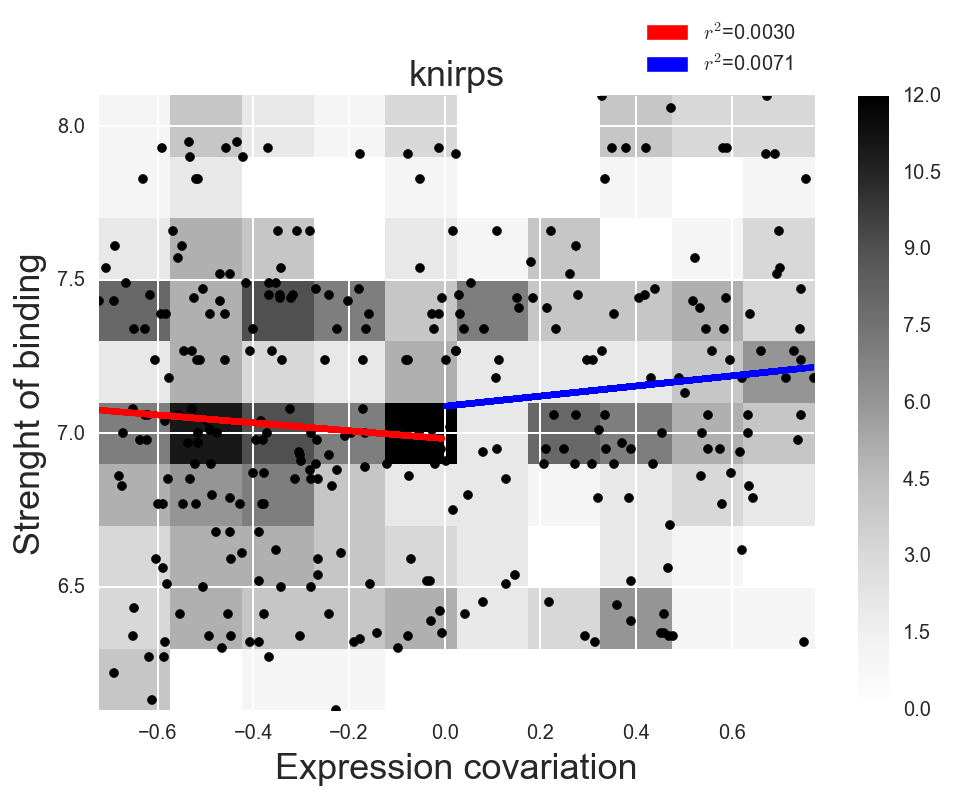

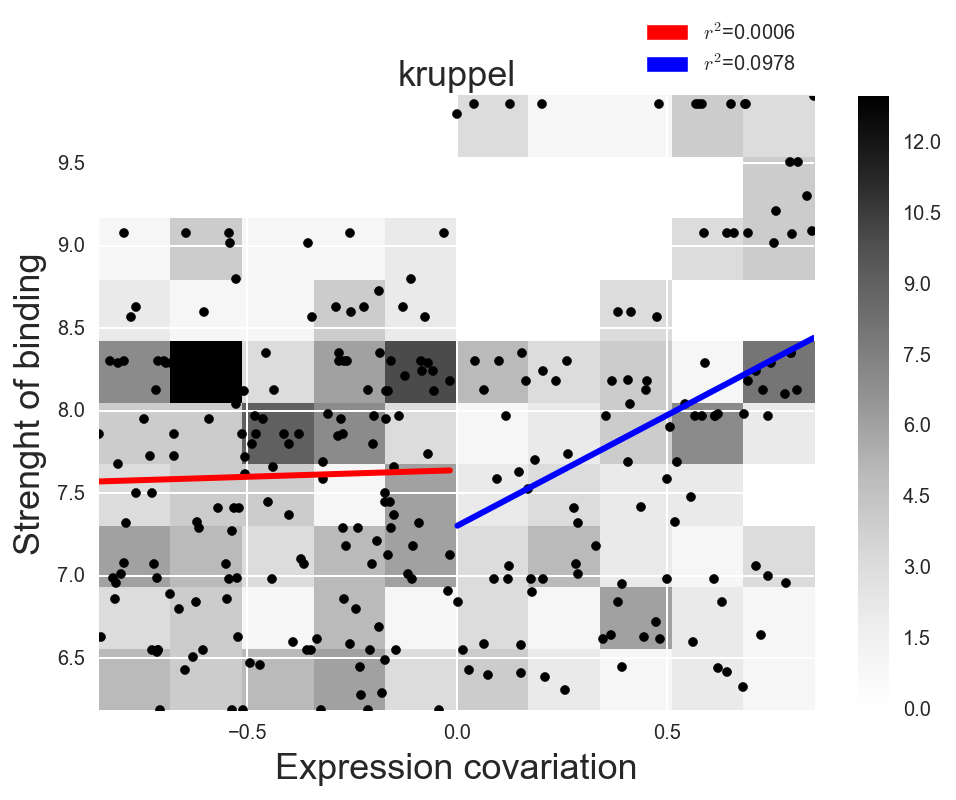

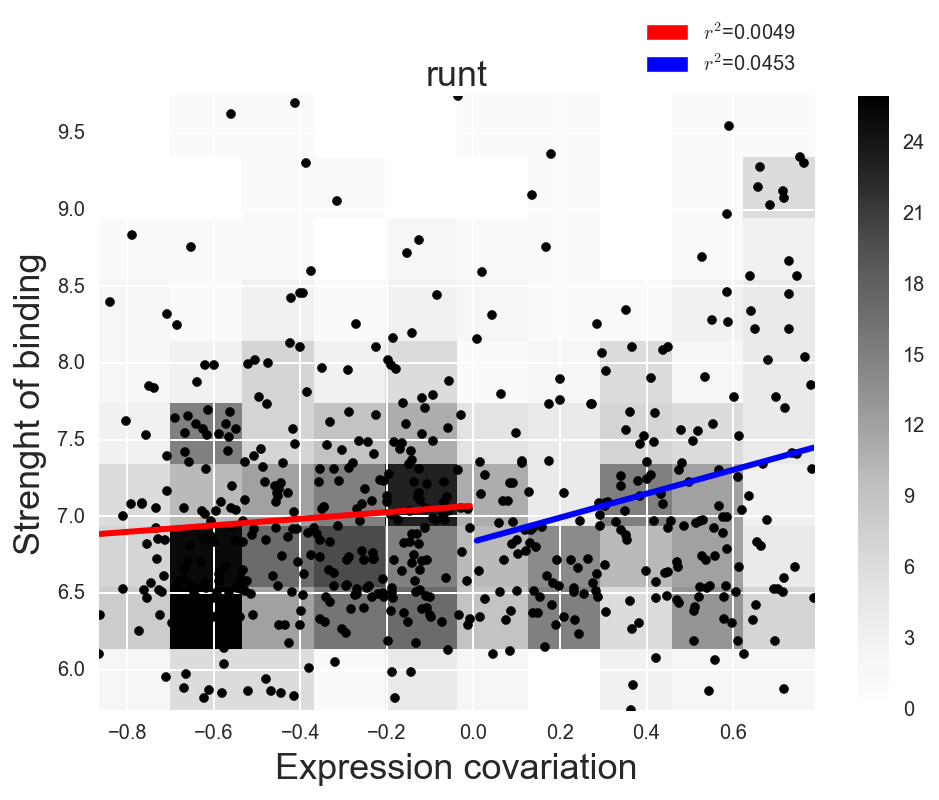

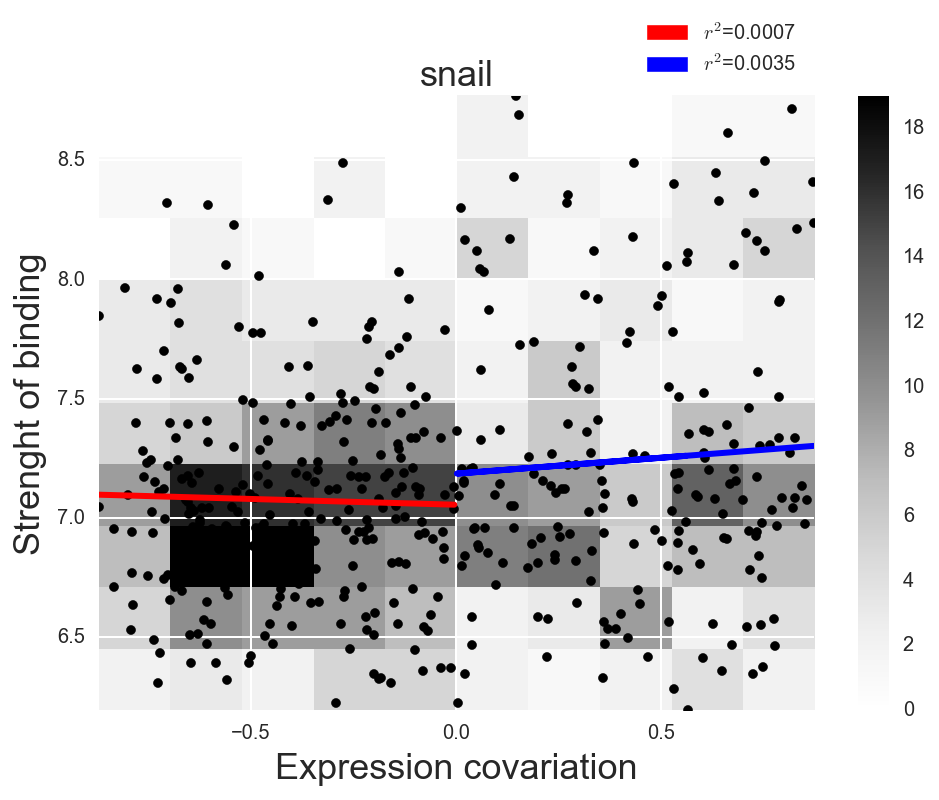

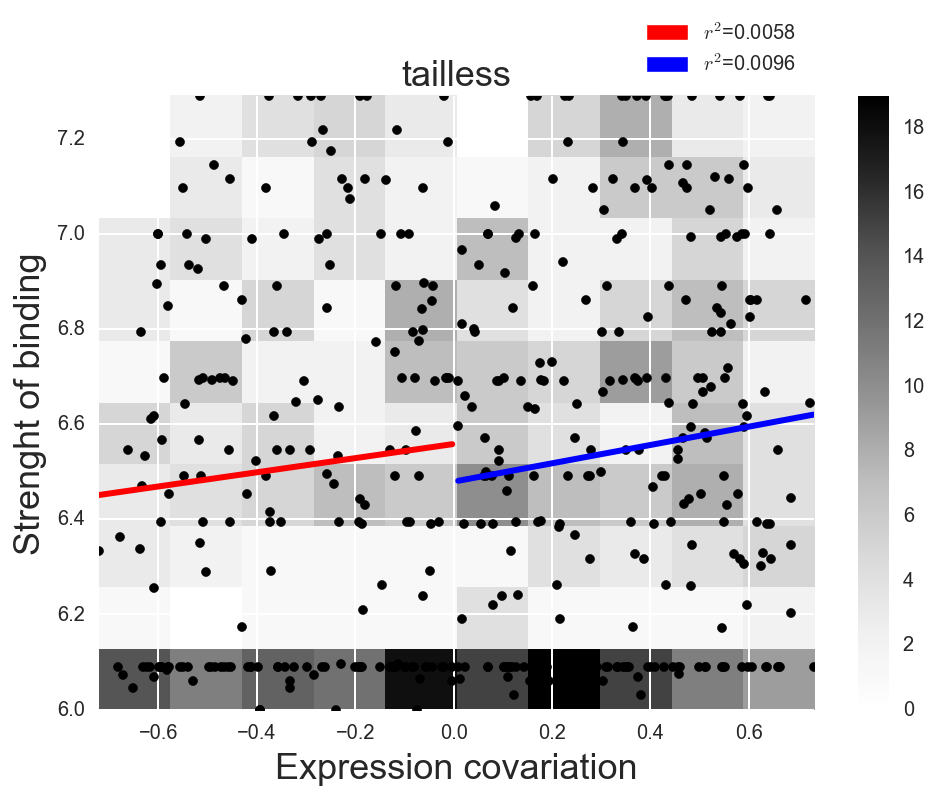

In [29]:
from sklearn import linear_model
import pandas as pd
import matplotlib.patches as mpatches
import glob
import os
all_files=[]

for f in glob.glob('../*.txt'):
    all_files.append(str(f))
#print all_files
all_files.sort(key=str.lower) #sort file names lexicographically

for i in range(0,len(all_files)):
    filename=all_files[i]
    df=pd.read_table(filename,names=["gene_names","str_of_binding","exp_covariation"],header=None)

    ########################################
    ########################################
    #plotly BEGIN##################################33    
    #data = [go.Histogram2d(x=df["exp_covariation"],y=df["str_of_binding"])]
    #iplot(data)
    ##########################################################################
    #END
    ##########################################################################
    
    
    
    #plt.figure(frameon=False)
    #f,axarr=plt.subplots(1,2,sharex=True, sharey=True)
    
    plt.hist2d(df["exp_covariation"],df["str_of_binding"])
    plt.colorbar()
    
    #A=np.histogram2d(df["exp_covariation"],df["str_of_binding"])
    #plt.show(A)
    # Create linear regression object

    regr = linear_model.LinearRegression()
    
    
    #plt.figure()
    TF_name=os.path.basename(filename).split(".")[0]
    plt.title(TF_name)
    plt.scatter(df["exp_covariation"],df["str_of_binding"],color='black')
    pos=df[df["exp_covariation"]>=0]
    x=np.reshape(pos["exp_covariation"],(-1,1))           #NEED TO DO THIS reshape stuff for some reason!
    y=np.reshape(pos["str_of_binding"],(-1,1))
    regr.fit(x,y)
    r_square_pos=regr.score(x,y)
    
    plt.plot(x, regr.predict(x), color='blue',linewidth=3)
    
    blue_patch = mpatches.Patch(color='blue', label="$r^2$=%.4f"%(r_square_pos))



    neg=df[df["exp_covariation"]<=0]
    x=np.reshape(neg["exp_covariation"],(-1,1))
    y=np.reshape(neg["str_of_binding"],(-1,1))
    regr.fit(x,y)
    r_square_neg=regr.score(x,y)
    plt.plot(x, regr.predict(x), color='red',linewidth=3)
        
    red_patch = mpatches.Patch(color='red', label="$r^2$=%.4f"%(r_square_neg))
    
    plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.00, 1.15))
    #plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
    
    plt.xlabel("Expression covariation")
    plt.ylabel("Strenght of binding")
    plt.show()
    #plt.savefig("%s.png"%(filename.split(".")[0]))
    
    
    #plt.savefig("%s.jpg"%(filename.split(".")[0]))
    

In [26]:
all_files

['../bicoid.txt',
 '../caudal.txt',
 '../engrailed.txt',
 '../even_skipped.txt',
 '../fushi tarazu.txt',
 '../Giant.txt',
 '../hairy.txt',
 '../Hunchback.txt',
 '../knirps.txt',
 '../kruppel.txt',
 '../runt.txt',
 '../snail.txt',
 '../tailless.txt',
 '../twist.txt']